In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Load CSV file
unemployed = Path("Resources/Unemployment_Canada_1976_present.csv")


# Unemployment



In [12]:
unemployed_df = pd.read_csv(unemployed)
unemployed_df.head()


,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [13]:
#Filtering sex, part time labour and full time labour out of the data frame.
filt_unemployed_df = unemployed_df.filter(items= ["REF_DATE", "GEO", "Age group", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])

#Dropping NA values
filt_unemployed_df.dropna(inplace=True)

#Creating a copy of the data frame for manipulation later
copy_filt_unemploy_df = filt_unemployed_df.copy()

#Preview of the data
filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7


In [14]:
filt_unemployed_df["Year"] = ""
filt_unemployed_df["Month"] = ""



filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate,Year,Month
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1,,
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2,,
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3,,
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8,,
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7,,


In [15]:
for i, row in filt_unemployed_df.iterrows():
    date = row["REF_DATE"].split("-")
    filt_unemployed_df.loc[i,"Year"] = date[0]
    filt_unemployed_df.loc[i,"Month"] = date[1]
   

filt_unemployed_df.head()

,REF_DATE,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate,Year,Month
0,1976-01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1,1976,01
1,1976-01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2,1976,01
2,1976-01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3,1976,01
3,1976-01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8,1976,01
4,1976-01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7,1976,01


In [16]:
filt_unemployed_df = filt_unemployed_df.filter(items= ["Year","Month", "GEO", "Age group", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])

filt_unemployed_df.head()

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976,01,Alberta,15 to 24 years,362300.0,252300.0,231800.0,20500.0,69.6,64.0,8.1
1,1976,01,Alberta,15 to 64 years,1154800.0,837500.0,802400.0,35000.0,72.5,69.5,4.2
2,1976,01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
3,1976,01,Alberta,25 to 54 years,661700.0,505800.0,491400.0,14400.0,76.4,74.3,2.8
4,1976,01,Alberta,25 years and over,914400.0,604200.0,587700.0,16500.0,66.1,64.3,2.7


In [17]:
filt_unemployed_df["GEO"].unique()

array(['Alberta', 'British Columbia', 'Canada', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan'],
      dtype=object)

In [18]:
provincial_unemploy = filt_unemployed_df.loc[filt_unemployed_df["GEO"] != "Canada"]
provincial_unemploy = filt_unemployed_df.loc[filt_unemployed_df["Age group"] == "15 years and over"]  
provincial_unemploy = provincial_unemploy[provincial_unemploy["Month"]== "01"]
provincial_unemploy

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
2,1976,01,Alberta,15 years and over,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
8,1976,01,British Columbia,15 years and over,1852400.0,1125400.0,1029700.0,95800.0,60.8,55.6,8.5
15,1976,01,Canada,15 years and over,16852400.0,10369700.0,9636700.0,733000.0,61.5,57.2,7.1
23,1976,01,Manitoba,15 years and over,732900.0,452800.0,427400.0,25300.0,61.8,58.3,5.6
29,1976,01,New Brunswick,15 years and over,476800.0,258700.0,229600.0,29100.0,54.3,48.2,11.2
...,...,...,...,...,...,...,...,...,...,...,...
38957,2023,01,Nova Scotia,15 years and over,851700.0,528100.0,501600.0,26500.0,62.0,58.9,5.0
38963,2023,01,Ontario,15 years and over,12628200.0,8276300.0,7849700.0,426600.0,65.5,62.2,5.2
38969,2023,01,Prince Edward Island,15 years and over,141500.0,90800.0,83900.0,7000.0,64.2,59.3,7.7
38975,2023,01,Quebec,15 years and over,7204500.0,4696900.0,4511600.0,185300.0,65.2,62.6,3.9


In [19]:
provincial_unemploy_2023 = provincial_unemploy[provincial_unemploy["GEO"] == "Canada"]
last_row = provincial_unemploy_2023.tail(1)
last_row


,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
38931,2023,01,Canada,15 years and over,32070400.0,21078300.0,20032300.0,1046000.0,65.7,62.5,5.0


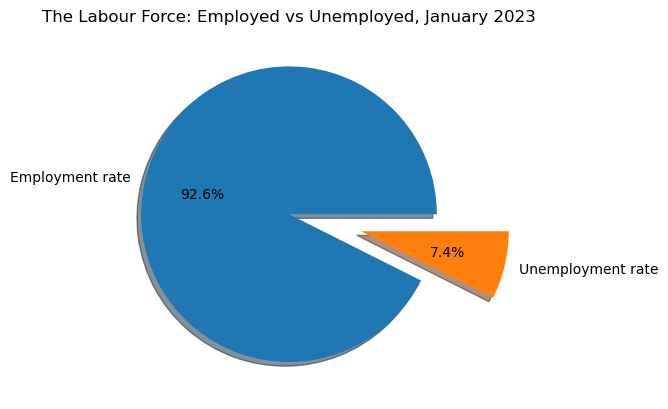

In [20]:
pie_chart_data = [last_row.iloc[0,9], last_row.iloc[0,10]]
labels = ["Employment rate", "Unemployment rate"]
colored = ["blue", "orange"]
plt.pie(pie_chart_data, labels=labels, autopct="%1.1f%%", explode=(0,.5), shadow= True)
plt.title("The Labour Force: Employed vs Unemployed, January 2023")
plt.show()

# Unemployment vs Expenditure

This analysis is trying to see if the unemployment rate would affect the household spending of different categories. 
We have selected 5 key categories, including Principle accomodation, Food, Recreation, Clothing and Personal insurance payment. 

Null hypothesis: There is no relationship between unemployment rate and household spending.
Hypothesis: There is a relationship between unemployment rate and household spending.

In [21]:
household_spending = Path("Resources/Household spending.csv")
household_spending_df = pd.read_csv(household_spending)
household_spending_df.head()

,REF_DATE,GEO,DGUID,Statistic,"Household expenditures, summary-level categories",UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010,Canada,2016A000011124,Average expenditure per household,Total expenditure,Dollars,81,units,0,v54325508,1.1.1,72075.0,NaN,NaN,NaN,0
1,2010,Canada,2016A000011124,Average expenditure per household,Total current consumption,Dollars,81,units,0,v54325509,1.1.2,54013.0,NaN,NaN,NaN,0
2,2010,Canada,2016A000011124,Average expenditure per household,Food expenditures,Dollars,81,units,0,v54325510,1.1.3,7850.0,NaN,NaN,NaN,0
3,2010,Canada,2016A000011124,Average expenditure per household,Food purchased from stores,Dollars,81,units,0,v54325511,1.1.4,5709.0,NaN,NaN,NaN,0
4,2010,Canada,2016A000011124,Average expenditure per household,Bakery products,Dollars,81,units,0,v64469102,1.1.43,581.0,NaN,NaN,NaN,0


In [22]:
filt_spending_df = household_spending_df.filter(items= ["REF_DATE", "GEO", "Household expenditures, summary-level categories", "VALUE"])
filt_spending_df = filt_spending_df.rename (columns={"REF_DATE": "Year", "Household expenditures, summary-level categories": "Categories", "VALUE":"Average Spending"})
filt_spending_df

,Year,GEO,Categories,Average Spending
0,2010,Canada,Total expenditure,72075.0
1,2010,Canada,Total current consumption,54013.0
2,2010,Canada,Food expenditures,7850.0
3,2010,Canada,Food purchased from stores,5709.0
4,2010,Canada,Bakery products,581.0
...,...,...,...,...
40373,2021,British Columbia,Gifts of money and support payments,1052.0
40374,2021,British Columbia,Gifts of money to persons living in Canada,594.0
40375,2021,British Columbia,Gifts of money to persons living outside Canada,213.0
40376,2021,British Columbia,Alimony and child support,NaN


In [23]:
#Change the data to yearly average

provincial_unemploy_avg_df = provincial_unemploy.filter(items= ["Year", "GEO", "Population", "Labour force", "Employment","Unemployment",
                           "Participation rate", "Employment rate", "Unemployment rate"])
provincial_unemploy_avg_df


#provincial_unemploy_avg_df = provincial_unemploy_avg_df.groupby(["Year","GEO"])
provincial_unemploy_avg_df = provincial_unemploy_avg_df.reset_index()

print(provincial_unemploy_avg_df.columns)
provincial_unemploy_avg_df

Index(['index', 'Year', 'GEO', 'Population', 'Labour force', 'Employment',
       'Unemployment', 'Participation rate', 'Employment rate',
       'Unemployment rate'],
      dtype='object')


,index,Year,GEO,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2,1976,Alberta,1276700.0,856500.0,819500.0,37000.0,67.1,64.2,4.3
1,8,1976,British Columbia,1852400.0,1125400.0,1029700.0,95800.0,60.8,55.6,8.5
2,15,1976,Canada,16852400.0,10369700.0,9636700.0,733000.0,61.5,57.2,7.1
3,23,1976,Manitoba,732900.0,452800.0,427400.0,25300.0,61.8,58.3,5.6
4,29,1976,New Brunswick,476800.0,258700.0,229600.0,29100.0,54.3,48.2,11.2
...,...,...,...,...,...,...,...,...,...,...
523,38957,2023,Nova Scotia,851700.0,528100.0,501600.0,26500.0,62.0,58.9,5.0
524,38963,2023,Ontario,12628200.0,8276300.0,7849700.0,426600.0,65.5,62.2,5.2
525,38969,2023,Prince Edward Island,141500.0,90800.0,83900.0,7000.0,64.2,59.3,7.7
526,38975,2023,Quebec,7204500.0,4696900.0,4511600.0,185300.0,65.2,62.6,3.9


In [24]:
#Merge 2 dataset
provincial_unemploy_avg_df['Year'] = provincial_unemploy_avg_df['Year'].astype(int)
filt_spending_df['Year'] = filt_spending_df['Year'].astype(int)

Spending_Unemployment = pd.merge(filt_spending_df, provincial_unemploy_avg_df, how="left", on=["Year", "GEO"])
Spending_Unemployment = Spending_Unemployment[(Spending_Unemployment["Year"] != 2018) & (Spending_Unemployment["Year"] != 2020) ]
Spending_Unemployment = Spending_Unemployment.drop("index",axis=1)
Spending_Unemployment

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2010,Canada,Total expenditure,72075.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
1,2010,Canada,Total current consumption,54013.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
2,2010,Canada,Food expenditures,7850.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
3,2010,Canada,Food purchased from stores,5709.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
4,2010,Canada,Bakery products,581.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
...,...,...,...,...,...,...,...,...,...,...,...
40373,2021,British Columbia,Gifts of money and support payments,1052.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40374,2021,British Columbia,Gifts of money to persons living in Canada,594.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40375,2021,British Columbia,Gifts of money to persons living outside Canada,213.0,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7
40376,2021,British Columbia,Alimony and child support,NaN,4320600.0,2849200.0,2631000.0,218200.0,65.9,60.9,7.7


In [25]:
Spending_Unemployment_wo2021 = Spending_Unemployment[Spending_Unemployment["Year"] != 2021]
Spending_Unemployment_wo2021

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2010,Canada,Total expenditure,72075.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
1,2010,Canada,Total current consumption,54013.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
2,2010,Canada,Food expenditures,7850.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
3,2010,Canada,Food purchased from stores,5709.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
4,2010,Canada,Bakery products,581.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
...,...,...,...,...,...,...,...,...,...,...,...
36512,2019,British Columbia,Gifts of money and support payments,2837.0,4203100.0,2796800.0,2666700.0,130200.0,66.5,63.4,4.7
36513,2019,British Columbia,Gifts of money to persons living in Canada,2187.0,4203100.0,2796800.0,2666700.0,130200.0,66.5,63.4,4.7
36514,2019,British Columbia,Gifts of money to persons living outside Canada,331.0,4203100.0,2796800.0,2666700.0,130200.0,66.5,63.4,4.7
36515,2019,British Columbia,Alimony and child support,320.0,4203100.0,2796800.0,2666700.0,130200.0,66.5,63.4,4.7


In [26]:
#other spending catagories
keyspending_df = Spending_Unemployment[(Spending_Unemployment["Categories"] == "Personal insurance payments and pension contributions") | (Spending_Unemployment["Categories"] =="Food expenditures")| (Spending_Unemployment["Categories"] =="Principal accommodation")| (Spending_Unemployment["Categories"] =="Clothing and accessories")| (Spending_Unemployment["Categories"] =="Recreation")]
keyspending_df.dropna(inplace=True)
keyspending_df

keyspending_on_df = keyspending_df[keyspending_df["GEO"]== "Ontario"]

keyspending_on_df.head()

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
2214,2010,Ontario,Food expenditures,7737.0,10645400.0,7124300.0,6476900.0,647400.0,66.9,60.8,9.1
2228,2010,Ontario,Principal accommodation,15045.0,10645400.0,7124300.0,6476900.0,647400.0,66.9,60.8,9.1
2321,2010,Ontario,Clothing and accessories,3636.0,10645400.0,7124300.0,6476900.0,647400.0,66.9,60.8,9.1
2417,2010,Ontario,Recreation,3451.0,10645400.0,7124300.0,6476900.0,647400.0,66.9,60.8,9.1
2517,2010,Ontario,Personal insurance payments and pension contri...,4084.0,10645400.0,7124300.0,6476900.0,647400.0,66.9,60.8,9.1


In [27]:
#other spending catagories without 2021

keyspending_on_wo2021_df = keyspending_on_df[keyspending_on_df["Year"]!= 2021]
keyspending_on_wo2021_df.tail()

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
34737,2019,Ontario,Food expenditures,10418.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6
34751,2019,Ontario,Principal accommodation,20421.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6
34840,2019,Ontario,Clothing and accessories,3552.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6
34924,2019,Ontario,Recreation,4560.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6
35022,2019,Ontario,Personal insurance payments and pension contri...,5346.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6


[]

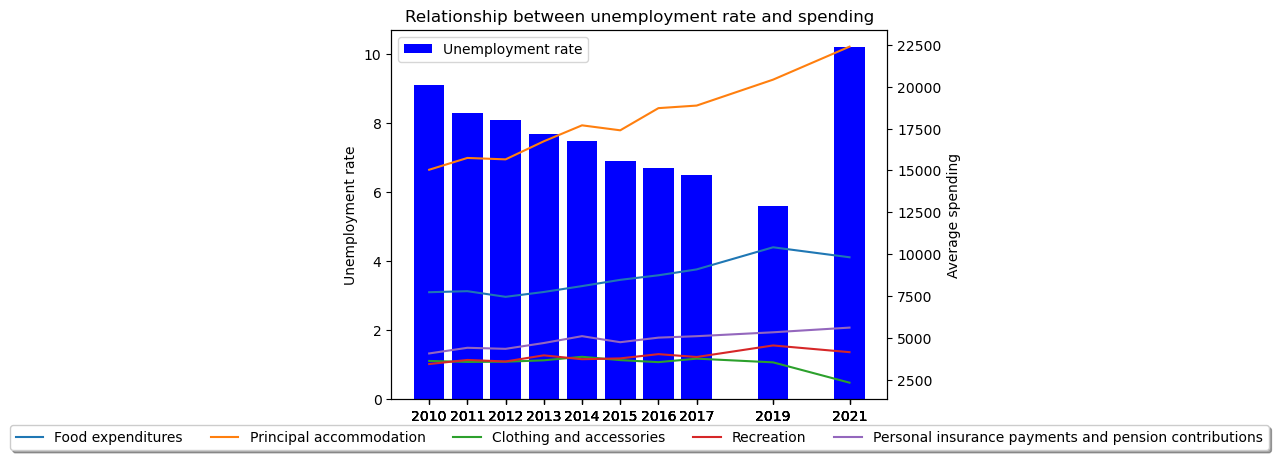

In [28]:
year = keyspending_on_df["Year"] 
avg_unemployment = keyspending_on_df["Unemployment rate"]
avg_spending = keyspending_on_df["Average Spending"]
categories = keyspending_on_df["Categories"]

fig, ax = plt.subplots()
ax.bar(year, avg_unemployment, color='blue', label="Unemployment rate")

ax2= ax.twinx()

for category in categories.unique():
    avg_spending_cat = keyspending_on_df[keyspending_on_df["Categories"] == category]["Average Spending"]
    year_cat = keyspending_on_df[keyspending_on_df["Categories"] == category]["Year"]
    ax2.plot(year_cat, avg_spending_cat, label=category)

# Label plot
ax.set_ylabel('Unemployment rate')
ax2.set_ylabel('Average spending')
ax.set_xlabel('Year')
plt.title('Relationship between unemployment rate and spending')
ax.set_xticks(year)
ax.set_xticklabels(year)
ax.legend()
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.plot()

[]

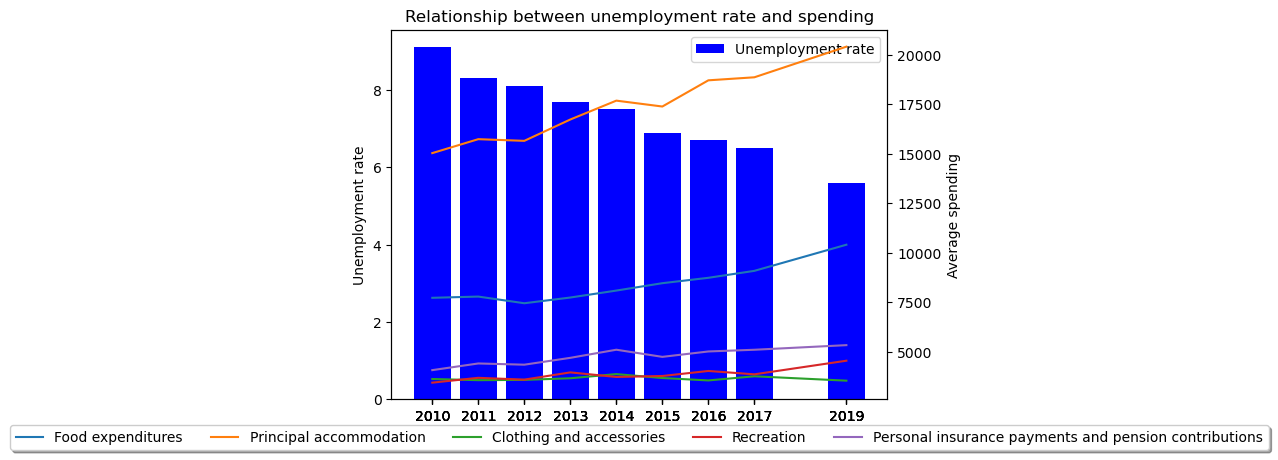

In [29]:
year_wo2021 = keyspending_on_wo2021_df["Year"]
avg_unemployment_wo2021 = keyspending_on_wo2021_df["Unemployment rate"]
avg_spending_wo2021 = keyspending_on_wo2021_df["Average Spending"]
categories_wo2021 = keyspending_on_wo2021_df["Categories"]

fig, ax = plt.subplots()
ax.bar(year_wo2021, avg_unemployment_wo2021, color='blue', label="Unemployment rate")

ax2= ax.twinx()

for category in categories_wo2021.unique():
    avg_spending_cat_wo2021 = keyspending_on_wo2021_df[keyspending_on_wo2021_df["Categories"] == category]["Average Spending"]
    year_cat_wo2021 = keyspending_on_wo2021_df[keyspending_on_wo2021_df["Categories"] == category]["Year"]
    ax2.plot(year_cat_wo2021, avg_spending_cat_wo2021, label=category)



# Label plot
ax.set_ylabel('Unemployment rate')
ax2.set_ylabel('Average spending')
ax.set_xlabel('Year')
plt.title('Relationship between unemployment rate and spending')
ax.set_xticks(year_wo2021)
ax.set_xticklabels(year_wo2021)
ax.legend()
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.plot()

From this chart, we can see that most of the categories seems to have a positive relationship as it is increasing when unemployment rate decreased. In order to verify this, regression will be used to further investage in the relationship between each categories and unemployment rate.

In [30]:
#Filter for different categories
insurance_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Personal insurance payments and pension contributions"]
insurance_df.dropna(inplace=True)
insurance_df

food_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Food expenditures"]
food_df.dropna(inplace=True)
food_df

clothing_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Clothing and accessories"]
clothing_df.dropna(inplace=True)
clothing_df

recreation_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Recreation"]
recreation_df.dropna(inplace=True)
recreation_df

housing_df = Spending_Unemployment[Spending_Unemployment["Categories"] == "Principal accommodation"]
housing_df.dropna(inplace=True)
housing_df

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
16,2010,Canada,Principal accommodation,13586.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
648,2010,Newfoundland and Labrador,Principal accommodation,9680.0,435700.0,258300.0,218800.0,39600.0,59.3,50.2,15.3
964,2010,Prince Edward Island,Principal accommodation,10573.0,115400.0,78300.0,70500.0,7900.0,67.9,61.1,10.1
1280,2010,Nova Scotia,Principal accommodation,10813.0,774100.0,493800.0,448100.0,45700.0,63.8,57.9,9.3
1596,2010,New Brunswick,Principal accommodation,10088.0,615800.0,397100.0,360400.0,36600.0,64.5,58.5,9.2
...,...,...,...,...,...,...,...,...,...,...,...
38613,2021,Ontario,Principal accommodation,22389.0,12280500.0,7894500.0,7086100.0,808400.0,64.3,57.7,10.2
39207,2021,Manitoba,Principal accommodation,16650.0,1049400.0,686500.0,631400.0,55100.0,65.4,60.2,8.0
39504,2021,Saskatchewan,Principal accommodation,17266.0,888100.0,597800.0,555700.0,42100.0,67.3,62.6,7.0
39801,2021,Alberta,Principal accommodation,21463.0,3527700.0,2452000.0,2199600.0,252400.0,69.5,62.4,10.3


In [31]:
insurance_wo2021_df = Spending_Unemployment_wo2021[Spending_Unemployment["Categories"] == "Personal insurance payments and pension contributions"]
insurance_wo2021_df.dropna(inplace=True)
insurance_wo2021_df


food_wo2021_df = Spending_Unemployment_wo2021[Spending_Unemployment_wo2021["Categories"] == "Food expenditures"]
food_wo2021_df.dropna(inplace=True)
food_wo2021_df

clothing_wo2021_df = Spending_Unemployment_wo2021[Spending_Unemployment_wo2021["Categories"] == "Clothing and accessories"]
clothing_wo2021_df.dropna(inplace=True)
clothing_wo2021_df

recreation_wo2021_df = Spending_Unemployment_wo2021[Spending_Unemployment_wo2021["Categories"] == "Transportation"]
recreation_wo2021_df.dropna(inplace=True)
recreation_wo2021_df

housing_wo2021_df = Spending_Unemployment_wo2021[Spending_Unemployment_wo2021["Categories"] == "Principal accommodation"]
housing_wo2021_df.dropna(inplace=True)
housing_wo2021_df

,Year,GEO,Categories,Average Spending,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
16,2010,Canada,Principal accommodation,13586.0,27403500.0,18361700.0,16824300.0,1537400.0,67.0,61.4,8.4
648,2010,Newfoundland and Labrador,Principal accommodation,9680.0,435700.0,258300.0,218800.0,39600.0,59.3,50.2,15.3
964,2010,Prince Edward Island,Principal accommodation,10573.0,115400.0,78300.0,70500.0,7900.0,67.9,61.1,10.1
1280,2010,Nova Scotia,Principal accommodation,10813.0,774100.0,493800.0,448100.0,45700.0,63.8,57.9,9.3
1596,2010,New Brunswick,Principal accommodation,10088.0,615800.0,397100.0,360400.0,36600.0,64.5,58.5,9.2
...,...,...,...,...,...,...,...,...,...,...,...
34751,2019,Ontario,Principal accommodation,20421.0,11949900.0,7781200.0,7342300.0,438900.0,65.1,61.4,5.6
35345,2019,Manitoba,Principal accommodation,15520.0,1034700.0,702300.0,662200.0,40100.0,67.9,64.0,5.7
35642,2019,Saskatchewan,Principal accommodation,17127.0,880800.0,607100.0,574200.0,33000.0,68.9,65.2,5.4
35939,2019,Alberta,Principal accommodation,20569.0,3428300.0,2457200.0,2294500.0,162800.0,71.7,66.9,6.6


# Regression analysis for each categories

R squared: 0.03598516844944281


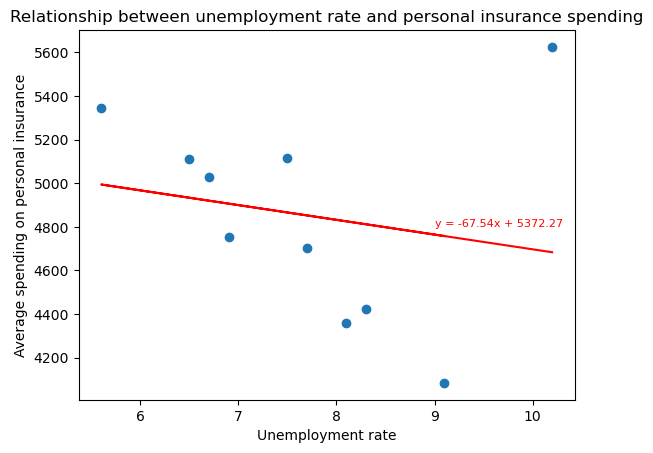

In [32]:
from scipy.stats import linregress
insurance_on_df = insurance_df[insurance_df["GEO"]== "Ontario"]
avg_unemployment = insurance_on_df["Unemployment rate"]
avg_spending = insurance_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(9,4800), fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on personal insurance')
plt.title('Relationship between unemployment rate and personal insurance spending')

# Print r square value
print(f"R squared: {rvalue**2}")
# Store r squared value for summary table
insurance_r = rvalue**2

# Show plot


plt.show()

R squared: 0.08547294204350186


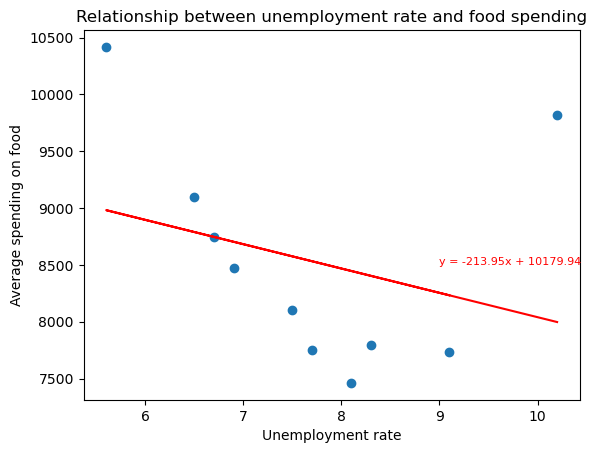

In [33]:
food_on_df = food_df[food_df["GEO"]== "Ontario"]
avg_unemployment = food_on_df["Unemployment rate"]
avg_spending = food_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(9,8500), fontsize=8, color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on food')
plt.title('Relationship between unemployment rate and food spending')

# Print r square value
print(f"R squared: {rvalue**2}")
# Store r squared value for summary table
food_r = rvalue**2

# Show plot

plt.show()

R squared: 0.41318590243883874


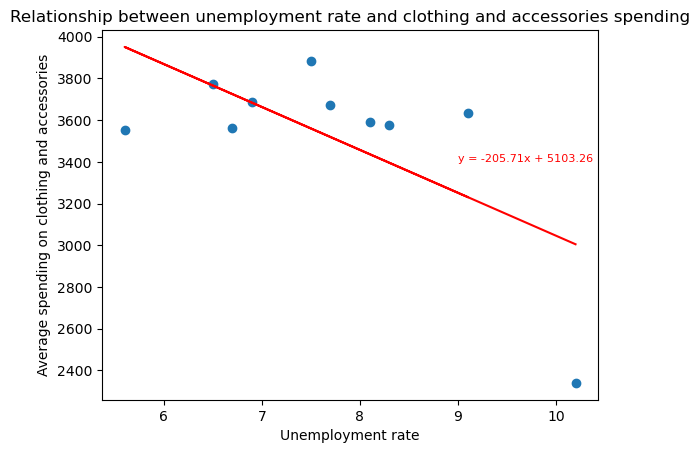

In [34]:
clothing_on_df = clothing_df[clothing_df["GEO"]== "Ontario"]
avg_unemployment = clothing_on_df["Unemployment rate"]
avg_spending = clothing_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq, (9,3400), fontsize=8, color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on clothing and accessories')
plt.title('Relationship between unemployment rate and clothing and accessories spending')

# Print r square value
print(f"R squared: {rvalue**2}")
# Store r squared value for summary table
clothing_r = rvalue**2

# Show plot


plt.show()

R squared: 0.17498248192738095


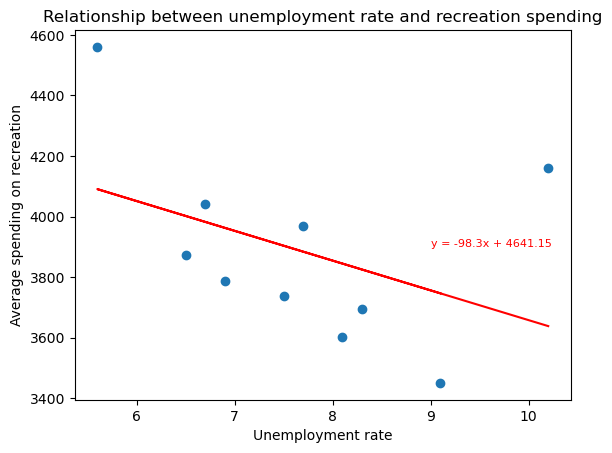

In [35]:
recreation_on_df = recreation_df[recreation_df["GEO"]== "Ontario"]
avg_unemployment = recreation_on_df["Unemployment rate"]
avg_spending = recreation_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(9,3900), fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on recreation')
plt.title('Relationship between unemployment rate and recreation spending')

# Print r square value
print(f"R squared: {rvalue**2}")
# Store r squared value for summary table
recreation_r = rvalue**2

# Show plot


plt.show()

R squared: 0.004256502489509681


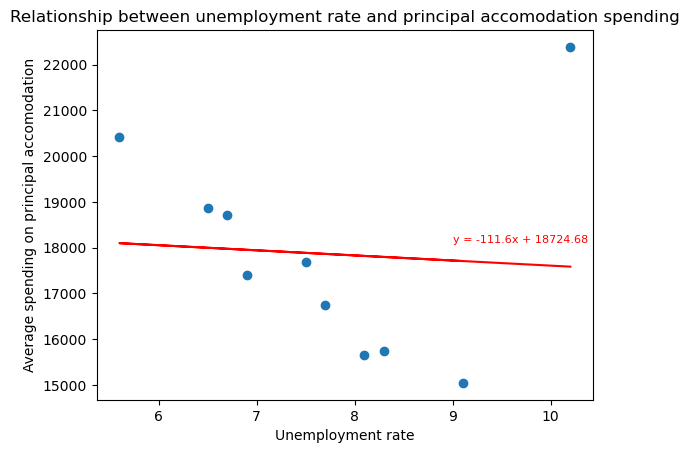

In [36]:
housing_on_df = housing_df[housing_df["GEO"]== "Ontario"]
avg_unemployment = housing_on_df["Unemployment rate"]
avg_spending = housing_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(9,18100), fontsize=8, color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on principal accomodation')
plt.title('Relationship between unemployment rate and principal accomodation spending')

# Print r square value
print(f"R squared: {rvalue**2}")
# Store r squared value for summary table
housing_r = rvalue**2

# Show plot


plt.show()

In [37]:
print("R Squared Summary")
print(f"Principle accomodation: {housing_r}")
print(f"Food: {food_r}")
print(f"Clothing and accessories: {clothing_r}")
print(f"Recreation: {recreation_r}")
print(f"Personal insurance payment and pension contribution: {insurance_r}")

R Squared Summary
Principle accomodation: 0.004256502489509681
Food: 0.08547294204350186
Clothing and accessories: 0.41318590243883874
Recreation: 0.17498248192738095
Personal insurance payment and pension contribution: 0.03598516844944281


In [38]:
spending_corr = keyspending_on_df.groupby('Categories')['Unemployment rate'].corr(keyspending_on_df['Average Spending'])
print("Correlation between Unemployment Rate and Average Spending for each spending category:")
spending_corr

Correlation between Unemployment Rate and Average Spending for each spending category:


Categories
Clothing and accessories                                -0.642795
Food expenditures                                       -0.292358
Personal insurance payments and pension contributions   -0.189698
Principal accommodation                                 -0.065242
Recreation                                              -0.418309
Name: Unemployment rate, dtype: float64

The relationship between unemployment rate and spending is relatively weak when we included unusual data during covid-19. So I tried to run another set of regression without the data in 2021.

Regression analysis without Covid-19 data

R squared: 0.8416755511984706


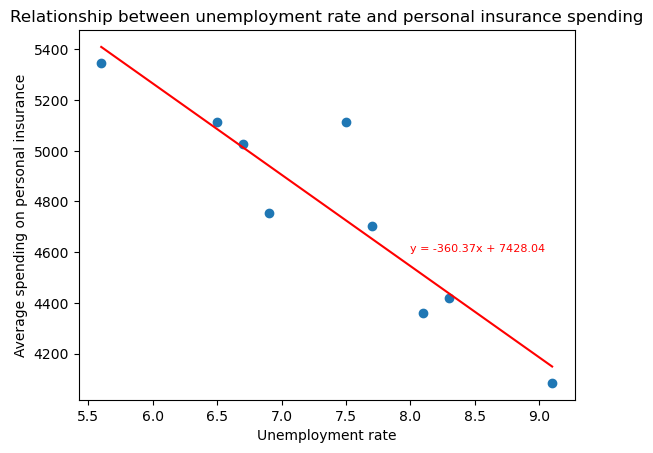

In [39]:
insurance_wo2021_on_df = insurance_wo2021_df[(insurance_wo2021_df["GEO"]== "Ontario")]
avg_unemployment = insurance_wo2021_on_df["Unemployment rate"]
avg_spending = insurance_wo2021_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(8,4600),fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on personal insurance')
plt.title('Relationship between unemployment rate and personal insurance spending')

# Print r square value
print(f"R squared: {rvalue**2}")
insurance_wo2021_r = rvalue**2
# Show plot
plt.show()

R squared: 0.8055917247929425


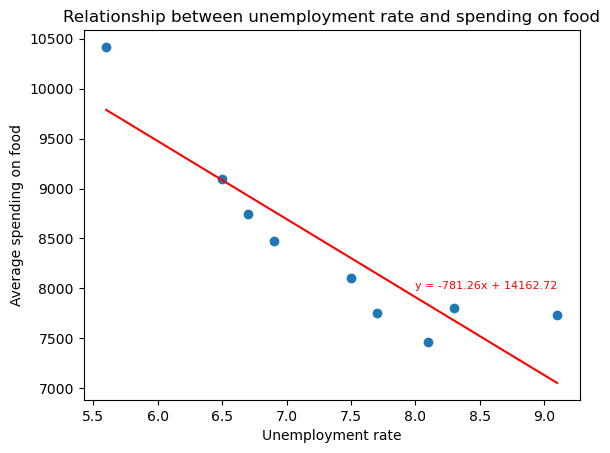

In [40]:
food_wo2021_on_df = food_wo2021_df[(food_wo2021_df["GEO"]== "Ontario")]
avg_unemployment = food_wo2021_on_df["Unemployment rate"]
avg_spending = food_wo2021_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(8,8000),fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on food')
plt.title('Relationship between unemployment rate and spending on food')

# Print r square value
print(f"R squared: {rvalue**2}")
food_wo2021_r = rvalue**2
# Show plot
plt.show()

R squared: 0.0001090256869446617


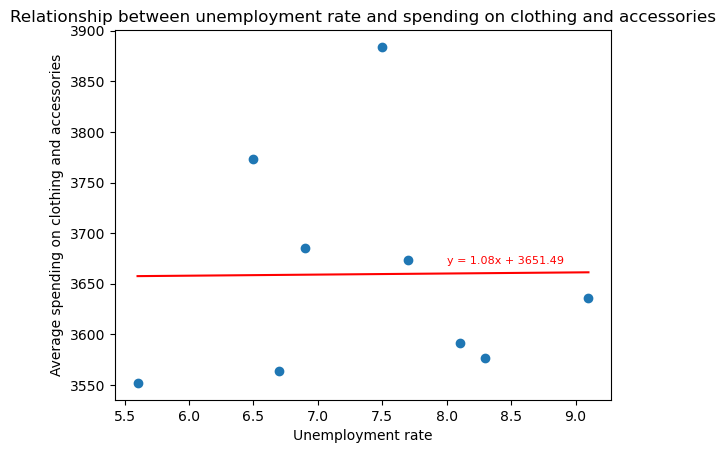

In [41]:
clothing_wo2021_on_df = clothing_wo2021_df[(clothing_wo2021_df["GEO"]== "Ontario")]
avg_unemployment = clothing_wo2021_on_df["Unemployment rate"]
avg_spending = clothing_wo2021_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(8,3670),fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on clothing and accessories')
plt.title('Relationship between unemployment rate and spending on clothing and accessories')

# Print r square value
print(f"R squared: {rvalue**2}")
clothing_wo2021_r = rvalue**2
# Show plot
plt.show()

R squared: 0.6504646479201985


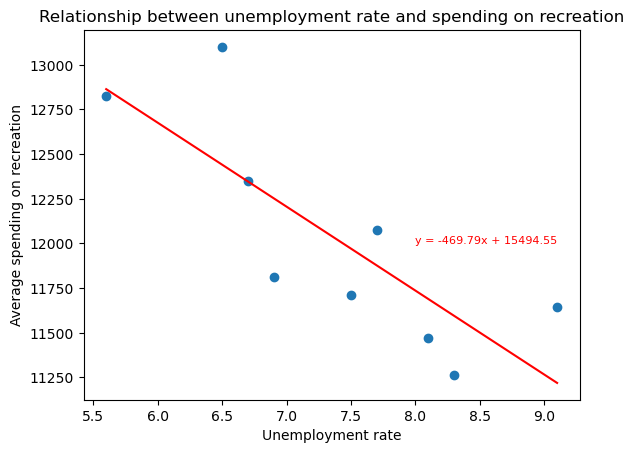

In [42]:
recreation_wo2021_on_df = recreation_wo2021_df[(recreation_wo2021_df["GEO"]== "Ontario")]
avg_unemployment = recreation_wo2021_on_df["Unemployment rate"]
avg_spending = recreation_wo2021_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(8,12000),fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on recreation')
plt.title('Relationship between unemployment rate and spending on recreation')

# Print r square value
print(f"R squared: {rvalue**2}")
recreation_wo2021_r = rvalue**2
# Show plot
plt.show()

R squared: 0.9412712389256049


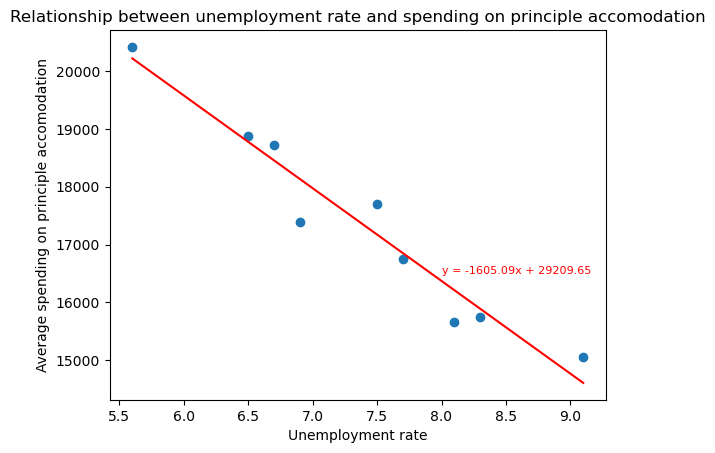

In [43]:
housing_wo2021_on_df = housing_wo2021_df[(housing_wo2021_df["GEO"]== "Ontario")]
avg_unemployment = housing_wo2021_on_df["Unemployment rate"]
avg_spending = housing_wo2021_on_df["Average Spending"]
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_unemployment, avg_spending)
regress_values = avg_unemployment * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(avg_unemployment,avg_spending)

# Plot regression line
plt.plot(avg_unemployment,regress_values,"r-")
plt.annotate(line_eq,(8,16500),fontsize=8,color="red")

# Label plot
plt.xlabel('Unemployment rate')
plt.ylabel('Average spending on principle accomodation')
plt.title('Relationship between unemployment rate and spending on principle accomodation')

# Print r square value
print(f"R squared: {rvalue**2}")
housing_wo2021_r = rvalue**2
# Show plot
plt.show()

In [44]:
print("R Squared Summary")
print(f"Principle accomodation: {housing_wo2021_r}")
print(f"Food: {food_wo2021_r}")
print(f"Clothing and accessories: {clothing_wo2021_r}")
print(f"Recreation: {recreation_wo2021_r}")
print(f"Personal insurance payment and pension contribution: {insurance_wo2021_r}")

R Squared Summary
Principle accomodation: 0.9412712389256049
Food: 0.8055917247929425
Clothing and accessories: 0.0001090256869446617
Recreation: 0.6504646479201985
Personal insurance payment and pension contribution: 0.8416755511984706


In [45]:
spending_wo2021_corr = keyspending_on_wo2021_df.groupby('Categories')['Unemployment rate'].corr(keyspending_on_wo2021_df['Average Spending'])
print("Correlation between Unemployment Rate and Average Spending for each spending category:")
spending_wo2021_corr

Correlation between Unemployment Rate and Average Spending for each spending category:


Categories
Clothing and accessories                                 0.010442
Food expenditures                                       -0.897548
Personal insurance payments and pension contributions   -0.917429
Principal accommodation                                 -0.970191
Recreation                                              -0.869220
Name: Unemployment rate, dtype: float64

After excluding data during Covid-19, it suggested that most of the spending on necessities such as accomodation, food and insurance and pension are having strong negative relationship with unemployment rate (r squared value > 0.8). 
However, unnecessary spending such as recreation (r squared value = 0.65) and clothing (r squared value = 0.0001) are having a moderate and no relationship with unemployment rate.

Therefore the hypothesis is partially accepted with unemployment rate is having a strong relationship with accomodation, food and personal insurance payment spending.

# Unemployment vs Immigration

In this section we'll be taking a look at the relationship between unemployment rates and immigration statistics for various provinces. We thought that immigration would be an interesting
statistic to measure in contrast to unemployment rates, as it's an issue that has been highlighted in the media lately in part due to recent changes to Canada's immigration policies. The question we are interested in answering is whether or not increased unemployment rates have an effect on immigration in Canada.

Null hypothesis: There is statistical significance that unemployment rates negatively correlate with immigration increases.

Hypothesis: There is no significant correlation between unemployment rates and immigration.

----------------------------------------------------------------------------------------------------------------------------------

For this study, we will be analyzing a data set called "Estimates of the components of international migration, by age and gender, Table: 17-10-0014-01" which is provided by Statistics Canada.
The data from this set ranges from 1971 - 2023 for all provinces. In plotting the data, we saw the most significant increases of immigration in Ontario, so our study will focus on
the relationship between immigration and unemployment for Ontario.

In [46]:
immigration = Path("Resources/Immigration_Data.csv")
immigration_df = pd.read_csv(immigration)

immigration_df.head()

,REF_DATE,GEO,DGUID,Gender,Type of migrant,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1971/1972,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,729,NaN,NaN,NaN,0
1,1972/1973,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,751,NaN,NaN,NaN,0
2,1973/1974,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,1128,NaN,NaN,NaN,0
3,1974/1975,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,995,NaN,NaN,NaN,0
4,1975/1976,Newfoundland and Labrador,2016A000210,Total - gender,Immigrants,All ages,Persons,249,units,0,v437654,2.1.1.1,1013,NaN,NaN,NaN,0


In [47]:
#Filtering sex, part time labour and full time labour out of the data frame.
filt_immigration_df = immigration_df.filter(items= ["REF_DATE", "GEO", "Age group", "VALUE"])
filt_immigration_df.rename(columns={'VALUE': 'Total Immigrants'}, inplace=True)
#Dropping NA values
filt_immigration_df.dropna(inplace=True)


#Preview of the data
filt_immigration_df.head()

,REF_DATE,GEO,Age group,Total Immigrants
0,1971/1972,Newfoundland and Labrador,All ages,729
1,1972/1973,Newfoundland and Labrador,All ages,751
2,1973/1974,Newfoundland and Labrador,All ages,1128
3,1974/1975,Newfoundland and Labrador,All ages,995
4,1975/1976,Newfoundland and Labrador,All ages,1013


In [48]:
#Filtering by starting year
filt_immigration_df["Year"] = ""
filt_immigration_df.head()

for i, row in filt_immigration_df.iterrows():
    date = row["REF_DATE"].split("/")
    filt_immigration_df.loc[i,"Year"] = date[0]
    
#Arranging columns   
filt_immigration_df = filt_immigration_df.filter(items= ["Year", "GEO", "Age group", "Total Immigrants"])

filt_immigration_df.head()


,Year,GEO,Age group,Total Immigrants
0,1971,Newfoundland and Labrador,All ages,729
1,1972,Newfoundland and Labrador,All ages,751
2,1973,Newfoundland and Labrador,All ages,1128
3,1974,Newfoundland and Labrador,All ages,995
4,1975,Newfoundland and Labrador,All ages,1013


In [49]:
# Filtering immigration data for Ontario data, All ages and years

filt_immigration_df['Year'] = filt_immigration_df['Year'].astype(int)

ontario_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Ontario") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1976) & (filt_immigration_df["Year"] <= 2022)]

ontario_immigration.rename(columns={"Age group": "Immigrant Age Group"}, inplace=True)


ontario_immigration.head()

,Year,GEO,Immigrant Age Group,Total Immigrants
265,1976,Ontario,All ages,63267
266,1977,Ontario,All ages,49986
267,1978,Ontario,All ages,40768
268,1979,Ontario,All ages,64536
269,1980,Ontario,All ages,54648


In [50]:
# Filtering unemployment data for Ontario, Year and Age group

filt_unemployed_df['Year'] = filt_unemployed_df['Year'].astype(int)

ontario_unemploy = filt_unemployed_df.loc[
    (filt_unemployed_df["GEO"] == "Ontario") &
    (filt_unemployed_df["Age group"] == "15 years and over") &
    (filt_unemployed_df["Month"] == "01") &
    (filt_unemployed_df['Year'] <= 2022) & (filt_unemployed_df["Year"] >= 1976)]



ontario_unemploy.head()

,Year,Month,GEO,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
47,1976,01,Ontario,15 years and over,6136300.0,3960000.0,3707400.0,252700.0,64.5,60.4,6.4
875,1977,01,Ontario,15 years and over,6275000.0,4048300.0,3776600.0,271700.0,64.5,60.2,6.7
1703,1978,01,Ontario,15 years and over,6407200.0,4148400.0,3859000.0,289300.0,64.7,60.2,7.0
2531,1979,01,Ontario,15 years and over,6526600.0,4342200.0,4036700.0,305500.0,66.5,61.8,7.0
3359,1980,01,Ontario,15 years and over,6644300.0,4442100.0,4146900.0,295100.0,66.9,62.4,6.6


In [51]:
#Merging immigration and unemployment dataframes for Ontario
ontario_merge = pd.merge(ontario_immigration, ontario_unemploy, how="left", on=["Year", "GEO"])

#Display merged dataframe
ontario_merge.head()


,Year,GEO,Immigrant Age Group,Total Immigrants,Month,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,1976,Ontario,All ages,63267,01,15 years and over,6136300.0,3960000.0,3707400.0,252700.0,64.5,60.4,6.4
1,1977,Ontario,All ages,49986,01,15 years and over,6275000.0,4048300.0,3776600.0,271700.0,64.5,60.2,6.7
2,1978,Ontario,All ages,40768,01,15 years and over,6407200.0,4148400.0,3859000.0,289300.0,64.7,60.2,7.0
3,1979,Ontario,All ages,64536,01,15 years and over,6526600.0,4342200.0,4036700.0,305500.0,66.5,61.8,7.0
4,1980,Ontario,All ages,54648,01,15 years and over,6644300.0,4442100.0,4146900.0,295100.0,66.9,62.4,6.6


In [52]:
#Filtering dataframes for Quebec, British Columbia and Alberta
filt_immigration_df['Year'] = filt_immigration_df['Year'].astype(int)

quebec_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Quebec") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]

bc_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "British Columbia") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]

alberta_immigration = filt_immigration_df.loc[
    (filt_immigration_df["GEO"] == "Alberta") &
    (filt_immigration_df["Age group"] == "All ages") &
    (filt_immigration_df["Year"] >= 1970) & (filt_immigration_df["Year"] <= 2022)]

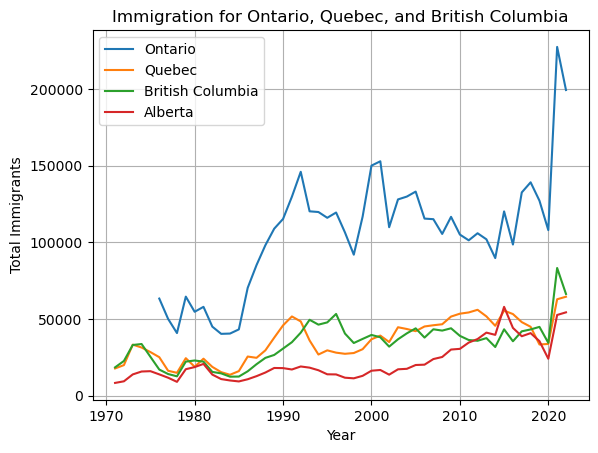

In [53]:
# Plotting data for Ontario immigration trends
plt.plot(ontario_immigration['Year'], ontario_immigration['Total Immigrants'], label='Ontario')
plt.plot(quebec_immigration['Year'], quebec_immigration['Total Immigrants'], label='Quebec')
plt.plot(bc_immigration['Year'], bc_immigration['Total Immigrants'], label='British Columbia')
plt.plot(alberta_immigration['Year'], alberta_immigration['Total Immigrants'], label='Alberta')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.title('Immigration for Ontario, Quebec, and British Columbia')
plt.grid()
plt.legend()

#Save the figure
plt.savefig("Visualizations/Immigration_1.png")

# Display the plot
plt.show()

For this visualization, we chose Canada's four largest provinces and plotted them to get an idea of what immigration patterns look like for each province. We discovered that Ontario appears 
to have the largest number of immigrants, along with much larger increases in immigration over the past 50 years. For this reason, we decided to choose Ontario as the province to take a closer look at in our study.

In this visualization, we plotted Ontario's immigration data on a bar plot, and overlayed it with a line plot of the unemployment rate for each year in our sample. Although we can see some variability in both metrics, it's difficult to say whether or not they are correlated or not.

[]

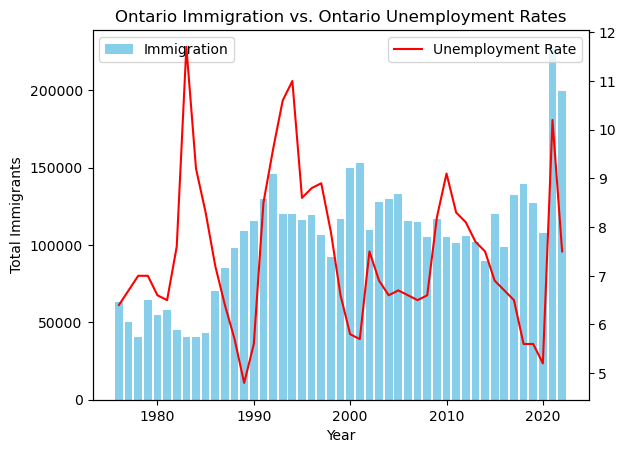

In [54]:
#Plotting bar chart for Ontario immigration totals by year,
fig, ax = plt.subplots()
ax.bar(ontario_immigration["Year"], ontario_immigration['Total Immigrants'], color='skyblue', label="Immigration")
ax.set_ylabel("Total Immigrants")
ax.set_xlabel("Year")

# Overlaying line chart of Ontario unemployment rates
ax2= ax.twinx()
ax2.plot(ontario_unemploy["Year"], ontario_unemploy['Unemployment rate'], color='red', label="Unemployment Rate")
plt.title("Ontario Immigration vs. Ontario Unemployment Rates")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout

#Save the figure
plt.savefig("Visualizations/Immigration_2.png")

ax.plot()

In this visualization, we plotted Ontario's immigration data on a bar plot, and overlayed it with a line plot of the unemployment rate for each year in our sample. Although we can see some variability in both metrics, it's difficult to say whether or not they are correlated or not.

R squared: 1.3159424872773572e-05


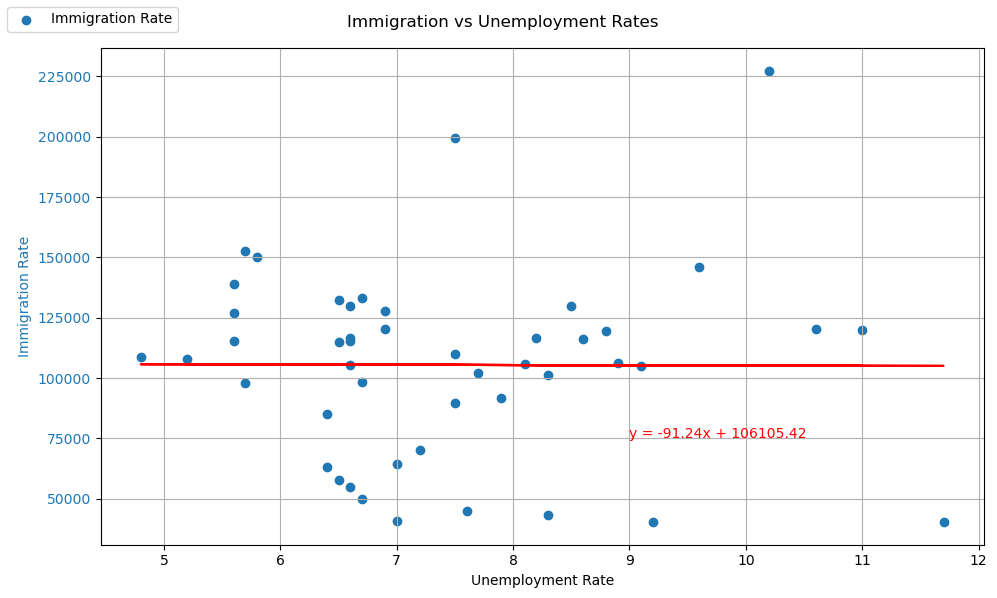

In [55]:
# Plotting a scatter plot for immigration in Ontario vs. unemployment rates
fig, ax1 = plt.subplots(figsize=(10, 6))
from scipy.stats import linregress

color = 'tab:blue'
ax1.set_xlabel('Unemployment Rate')
ax1.set_ylabel('Immigration Rate', color=color)
ax1.scatter(ontario_merge['Unemployment rate'], ontario_merge['Total Immigrants'], color=color, label='Immigration Rate')
ax1.tick_params(axis='y', labelcolor=color)

# Definining linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(ontario_merge['Unemployment rate'], ontario_merge['Total Immigrants'])
regress_values = ontario_merge['Unemployment rate'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(9, 75000), color='r')
plt.plot(ontario_merge['Unemployment rate'], regress_values, "r-")
fig.suptitle('Immigration vs Unemployment Rates')
fig.legend(loc="upper left")
fig.tight_layout()
print(f"R squared: {rvalue**2}")
plt.grid(True)

#Save the figure
plt.savefig("Visualizations/Immigration_3.png")

plt.show()


In this visualization, we plotted immigration data against unemployment rate data for the years in our sample in a scatter plot. We then ran a linear regression model to calculate the correlation. What we found is that there is a very weak correlation between unemployment rates and immigration in Ontario.

In [56]:
#Obtaining the correlation coefficient and rvalue of the between Total revenue and unemployment rate
correlation = round(st.pearsonr(ontario_merge["Unemployment rate"], ontario_merge["Total Immigrants"])[0],4)
print(f'The pearson correlation coefficient between unemployment rate and transit revenue is {correlation}')
print(f'This suggests there is a very weak correlation.')

The pearson correlation coefficient between unemployment rate and transit revenue is -0.0036
This suggests there is a very weak correlation.


The regression model suggests that there is very little to no correlation between immigration and unemployment rates in Ontario.  With this understanding, we can easily reject the null
hypothesis that these two metrics are positively correlated. Based on our findings, increases to immigration do not appear to have a significant impact on unemployment rates in Ontario.

# Unemployment vs Public Transit

Next we take a look at whether or not unemployment can be used to measure and predict public transit revenue and total transit passengers. The thought process/assumption going into this analysis is that, unemployment should have some impact on the transit sector. Perhaps when unemployment is high, more people will choosing to take public transit over driving/owning a car as they try to avoid car payments and gas prices. Alternatively, it could be that when unemployment is high, more people choose to reduce their spending by commuting less and only commuting when essential. Thus, we believe there will be a significant correlation between unemployment and the public transit sector.


Null Hypothesis: There is no statistical significance between Unemployment and public transit.

Hypothesis: Unemployment is a factor that inifluences public transit (revenue).
____________________________________________________________________________________________________________________________________________


To go about this, we will be using data on public transit provided by Statistics Canada (Statistics Canada, Table 23-10-0251-01) and merging onto our unemployment data. The data on public transit revenue has a date range from January 2017, to January 2024, so ideally our analysis would be within this date range. However, the data is categorized by Cananda followed by the combined data of two or more provinces, example Quebec and Ontario or Atlantic. Due to time restraints of this project, we will just be looking at the data of Canada. When our unemployment data frame is filtered for Canada only (provinces filtered out), the date range is from January 1976 to January 2023. So upon merging the two frames, we will look at monthly data from January 2017 until January 2023.

In [58]:
#Reading in the public transit data

pub_trans = Path("Resources/public_trans_revenue(data_loading).csv")
pub_trans_df = pd.read_csv(pub_trans)

#displaying data

pub_trans_df.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Total revenue and total passenger trips,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,302.6,NaN,NaN,NaN,1
1,2017-02,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,314.5,NaN,NaN,NaN,1
2,2017-03,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,350.1,NaN,NaN,NaN,1
3,2017-04,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,309.6,NaN,NaN,NaN,1
4,2017-05,Canada,2016A000011124,Urban transit systems [485110],"Total revenue, excluding subsidies",Dollars,81,millions,6,v110673359,1.1.1,307.6,NaN,NaN,NaN,1


In [59]:
#Confirming how the data is catagorized by province
pub_trans_df["GEO"].unique()

array(['Canada', 'Atlantic', 'Quebec and Ontario',
       'Prairies, British Columbia and Territories'], dtype=object)

In [60]:
#Filtering the public transit data to just Canada. no provinces. 
canada_pub_df = pub_trans_df.loc[pub_trans_df["GEO"] == "Canada"]

In [61]:
#Cleaning the data. Filtering columns.

filtdf_can_pub = canada_pub_df.filter(items= ["REF_DATE", "GEO", "North American Industry Classification System (NAICS)",
                                    "Total revenue and total passenger trips", "VALUE", "SCALAR_FACTOR"])

# Preview the data
filtdf_can_pub.head()  

,REF_DATE,GEO,North American Industry Classification System (NAICS),Total revenue and total passenger trips,VALUE,SCALAR_FACTOR
0,2017-01,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",302.6,millions
1,2017-02,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",314.5,millions
2,2017-03,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",350.1,millions
3,2017-04,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",309.6,millions
4,2017-05,Canada,Urban transit systems [485110],"Total revenue, excluding subsidies",307.6,millions


In [62]:
#confirming number of rows
print(f'filtdf_can_pub has {filtdf_can_pub.shape[0]} number of rows')

#Dropping rows with no values and checking if any rows were dropped.
filtdf_can_pub.dropna(inplace=True)
print(f'filtdf_can_pub has {filtdf_can_pub.shape[0]} rows after droping null values')

filtdf_can_pub has 170 number of rows
filtdf_can_pub has 170 rows after droping null values


In [63]:
#Only the csv containing urban transit system data acquired. No rural transit systems present in this data.
print(f'{filtdf_can_pub["North American Industry Classification System (NAICS)"].unique()}')



['Urban transit systems [485110]']


In [64]:
#Further data cleaning and filtering.

#Removing the column from the data frame for readability
filtdf_can_pub.drop("North American Industry Classification System (NAICS)", axis=1, inplace= True)

#Seperating the "Total revenue and total passenger trips" column into two seperate data frames.
passtrips_can_df = filtdf_can_pub.loc[filtdf_can_pub["Total revenue and total passenger trips"] == 'Total passenger trips']
TotRev_can_df = filtdf_can_pub.loc[filtdf_can_pub["Total revenue and total passenger trips"] == 'Total revenue, excluding subsidies']

In [65]:
#cleaning the copy unemployment data frame. filtering age group to 15+ and geo to Canada only
filt_unemploy =  copy_filt_unemploy_df[(copy_filt_unemploy_df["Age group"] == "15 years and over")
                                            & (copy_filt_unemploy_df["GEO"] == "Canada")]


#merging unemployment onto transit revenue and transit passengers

merged_passtrips = passtrips_can_df.merge(filt_unemploy, how='left', on=["REF_DATE", "GEO"])
merged_totrev = TotRev_can_df.merge(filt_unemploy, how='left', on=["REF_DATE", "GEO"])

#dropping columns with null values
merged_passtrips.dropna(inplace=True)
merged_totrev.dropna(inplace=True)

In [66]:
#preview data
merged_passtrips.head()

,REF_DATE,GEO,Total revenue and total passenger trips,VALUE,SCALAR_FACTOR,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2017-01,Canada,Total passenger trips,144.2,millions,15 years and over,29579400.0,19548500.0,18223200.0,1325300.0,66.1,61.6,6.8
1,2017-02,Canada,Total passenger trips,143.6,millions,15 years and over,29605000.0,19543400.0,18251500.0,1291900.0,66.0,61.7,6.6
2,2017-03,Canada,Total passenger trips,166.2,millions,15 years and over,29635700.0,19578600.0,18272700.0,1305900.0,66.1,61.7,6.7
3,2017-04,Canada,Total passenger trips,144.4,millions,15 years and over,29667200.0,19565100.0,18296700.0,1268400.0,65.9,61.7,6.5
4,2017-05,Canada,Total passenger trips,144.5,millions,15 years and over,29706800.0,19635400.0,18332500.0,1302900.0,66.1,61.7,6.6


In [67]:
#preview data
merged_totrev.head()

,REF_DATE,GEO,Total revenue and total passenger trips,VALUE,SCALAR_FACTOR,Age group,Population,Labour force,Employment,Unemployment,Participation rate,Employment rate,Unemployment rate
0,2017-01,Canada,"Total revenue, excluding subsidies",302.6,millions,15 years and over,29579400.0,19548500.0,18223200.0,1325300.0,66.1,61.6,6.8
1,2017-02,Canada,"Total revenue, excluding subsidies",314.5,millions,15 years and over,29605000.0,19543400.0,18251500.0,1291900.0,66.0,61.7,6.6
2,2017-03,Canada,"Total revenue, excluding subsidies",350.1,millions,15 years and over,29635700.0,19578600.0,18272700.0,1305900.0,66.1,61.7,6.7
3,2017-04,Canada,"Total revenue, excluding subsidies",309.6,millions,15 years and over,29667200.0,19565100.0,18296700.0,1268400.0,65.9,61.7,6.5
4,2017-05,Canada,"Total revenue, excluding subsidies",307.6,millions,15 years and over,29706800.0,19635400.0,18332500.0,1302900.0,66.1,61.7,6.6


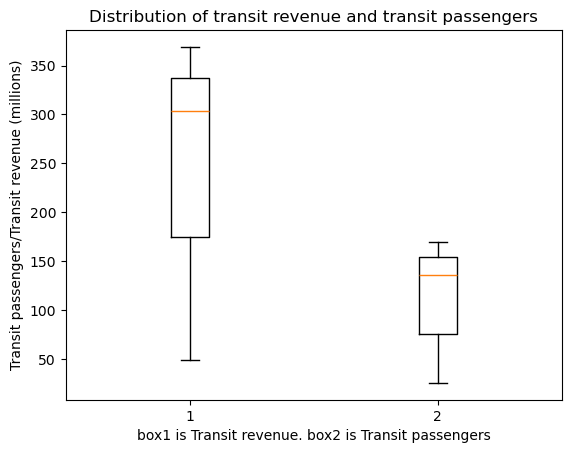

In [68]:
# Generating a box plot to check for outliers in transit revenue and transit 
# passengers
trans_revenue = merged_totrev["VALUE"]
trans_pass = merged_passtrips["VALUE"]

list_values = []
list_values.append(trans_revenue)
list_values.append(trans_pass)


flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='black')
plt.boxplot(list_values, flierprops=flierprops)
plt.title("Distribution of transit revenue and transit passengers")
plt.xlabel("box1 is Transit revenue. box2 is Transit passengers")
plt.ylabel("Transit passengers/Transit revenue (millions)")
plt.savefig("Visualizations/PubTransit_1.png")
plt.show()

In [69]:
print("No outliers found in the observed data set")

No outliers found in the observed data set


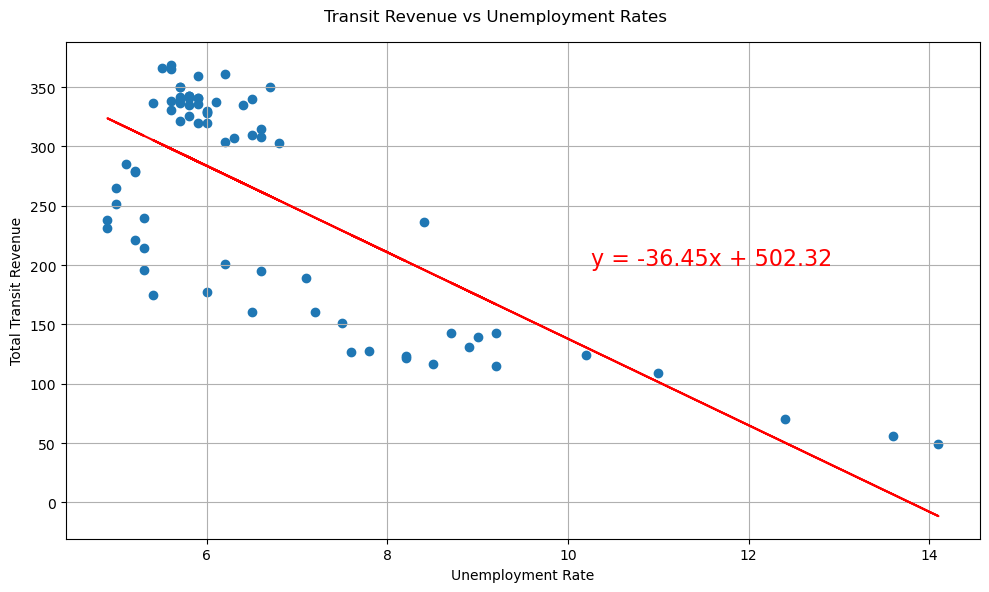

In [70]:
#Linear Regression
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Unemployment Rate')
ax1.set_ylabel('Total Transit Revenue')
ax1.scatter(merged_totrev["Unemployment rate"], trans_revenue,)
ax1.tick_params(axis='y')


(slope, intercept, Rvalue, pvalue, stderr) = linregress(merged_totrev["Unemployment rate"], trans_revenue)
regress_values = merged_totrev["Unemployment rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(10.25, 200), color='r', size= 16)
plt.plot(merged_totrev["Unemployment rate"], regress_values, "r-")
fig.suptitle('Transit Revenue vs Unemployment Rates')
fig.tight_layout()
plt.grid(True)
plt.savefig("Visualizations/PubTransit_2.png")
plt.show()

In [71]:
#Obtaining the correlation coefficient and rvalue of the between Total revenue and unemployment rate
correlation = round(st.pearsonr(merged_totrev["Unemployment rate"], trans_revenue)[0],2)
print(f'The pearson correlation coefficient between unemployment rate and transit revenue is {correlation}')
print(f'This suggests there is a strong (negative) correlation')

The pearson correlation coefficient between unemployment rate and transit revenue is -0.74
This suggests there is a strong (negative) correlation


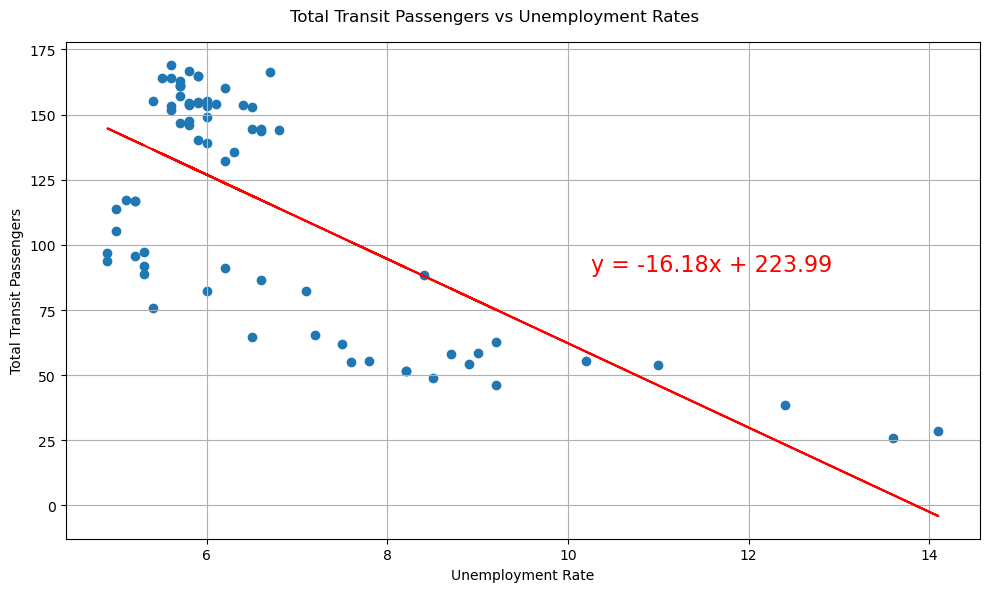

In [72]:
#Linear Regression
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.set_xlabel('Unemployment Rate')
ax1.set_ylabel('Total Transit Passengers')
ax1.scatter(merged_passtrips["Unemployment rate"], trans_pass,)
ax1.tick_params(axis='y')


(slope, intercept, Rvalue, pvalue, stderr) = linregress(merged_passtrips["Unemployment rate"], trans_pass)
regress_values = merged_passtrips["Unemployment rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(10.25, 90), color='r', size= 16)
plt.plot(merged_passtrips["Unemployment rate"], regress_values, "r-")
fig.suptitle('Total Transit Passengers vs Unemployment Rates')
fig.tight_layout()
plt.grid(True)
plt.savefig("Visualizations/PubTransit_4.png")
plt.show()

In [73]:
#Obtaining the correlation coefficient and rvalue of the between Total revenue and unemployment rate
correlation = round(st.pearsonr(merged_passtrips["Unemployment rate"], trans_pass)[0],2)
print(f'The pearson correlation coefficient between unemployment rate and total transit passengers is {correlation}')
print(f'This suggests there is a moderate (negative) correlation')

The pearson correlation coefficient between unemployment rate and total transit passengers is -0.69
This suggests there is a moderate (negative) correlation


At first glance, the regression models suggests there is a linear relationship between unemployment rate and the transit sector. This would imply it is safe to reject the null hypothesis, that there is no meaninful reationship between public transit and unemployment. Furthermore, we see that as unemployment increases, we see a decrease in transit revenue and passengers implying that there is a negative correlation. Perhaps, as unemployment rises, more people are opting to reduce how often they commute.

However, it is worth pointing out that the data may be heavily influenced by the pandemic starting in 2020. Around the offset of the pandemic, there was a substantial increase in uneployment and a substantial decrease in public transit operation. It is beyond the scope of this project to explore how much of the relationship between unemployment and public transit can be explained away by looking at covid's impact.

Transit Revenue: Expected values vs Actual values.

In [74]:
#Created a subset data frame of just total transit revenue and unemployed rate by dates
rev_subset_data = merged_totrev[["REF_DATE", "Unemployment rate", "VALUE"]]
rev_subset_data.rename(columns={"VALUE": "Observed Revenue"}, inplace=True)

#Created a subset data frame of total passengers and unemployed rates by dates
pass_subset_data = merged_passtrips[["REF_DATE", "Unemployment rate", "VALUE"]]
pass_subset_data.rename(columns={"VALUE": "Observed Passengers"}, inplace=True)


#Creating a column to hold expected values.
rev_subset_data["Expected Revenue"] = ""
pass_subset_data["Expected Passengers"] = ""

#Using line_eq y = -36.45x + 502.32, calculating expected values.

for i, row in rev_subset_data.iterrows():
    rev_subset_data.loc[i,"Expected Revenue"] = (-36.45 * row["Unemployment rate"]) + 502.32

for i, row in pass_subset_data.iterrows():
    pass_subset_data.loc[i,"Expected Passengers"] = (-16.18 * row["Unemployment rate"]) + 223.99 


#Merging data frames for viewing and analyzing
expected_vs_actual_df = rev_subset_data.merge(pass_subset_data, on=["REF_DATE", "Unemployment rate"], how='left')

expected_vs_actual_df.head()

,REF_DATE,Unemployment rate,Observed Revenue,Expected Revenue,Observed Passengers,Expected Passengers
0,2017-01,6.8,302.6,254.46,144.2,113.966
1,2017-02,6.6,314.5,261.75,143.6,117.202
2,2017-03,6.7,350.1,258.105,166.2,115.584
3,2017-04,6.5,309.6,265.395,144.4,118.82
4,2017-05,6.6,307.6,261.75,144.5,117.202


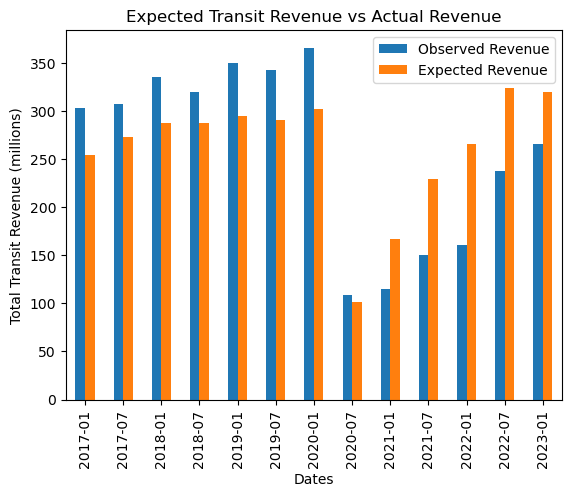

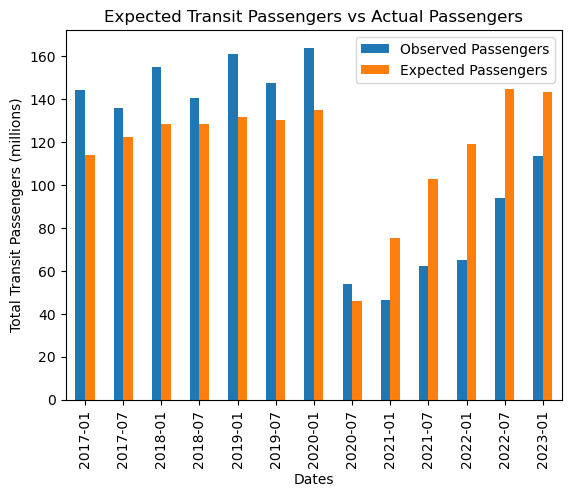

In [75]:
#Bar plotting observed values and expected values.
#For simplicity, we will look at January and July data points.
jan_july_rev = expected_vs_actual_df[(expected_vs_actual_df["REF_DATE"].str.contains('-01')) |
                               (expected_vs_actual_df["REF_DATE"].str.contains('-07'))]


jan_july_rev.set_index("REF_DATE",inplace=True)


jan_july_rev[["Observed Revenue", "Expected Revenue"]].plot.bar()
plt.xlabel("Dates")
plt.ylabel("Total Transit Revenue (millions)")
plt.title("Expected Transit Revenue vs Actual Revenue")
plt.savefig("Visualizations/PubTransit_3.png")
plt.subplot(1, 1, 1)


jan_july_rev[["Observed Passengers", "Expected Passengers"]].plot.bar()
plt.xlabel("Dates")
plt.ylabel("Total Transit Passengers (millions)")
plt.title("Expected Transit Passengers vs Actual Passengers")
plt.savefig("Visualizations/PubTransit_5.png")
#plt.subplot(2, 1, 1)

Two Sample T-test: Observed values and expected. 

Null Hypothesis(H0) -> The mean of observed vales = the mean of expected values.

Alternative Hypothesis(HA) -> The mean of observed values =/= the mean of expected values. 

In [76]:
revenue_series = expected_vs_actual_df["Observed Revenue"].astype(float)
ex_revenue_series = rev_subset_data["Expected Revenue"].astype(float)
st.ttest_ind(revenue_series, ex_revenue_series, equal_var=False)

TtestResult(statistic=0.0019169530649758523, pvalue=0.9984733721357772, df=132.71501521380407)

In [77]:
passenger_series = expected_vs_actual_df["Observed Passengers"].astype(float)
ex_passenger_series = expected_vs_actual_df["Expected Passengers"].astype(float)
st.ttest_ind(passenger_series, ex_passenger_series, equal_var=False)

TtestResult(statistic=0.002898732720538333, pvalue=0.9976916508450125, df=128.31786649153483)

With both p-values of .99, we fail to reject the null hypothesis that the mean of observed values = the mean of expected values. This is likely due to unemployment rates being unable to fully explain the transit sector. There are likely other variables involved. 